# Project 8: Markov Simulation -- Data Wrangling

Load all the packages you are going to use.

**Data manipulation**

In [1]:
import pandas as pd
import numpy as np 
import os

# 1. Define project goal

In this project, I will write a program that simulates customer behaviour in a supermarket.

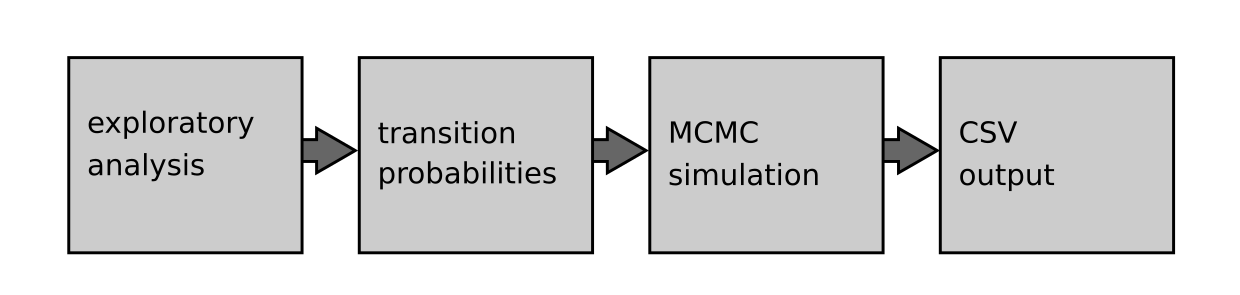

The project involves the following tasks:

1. Explore the data (includes pandas wrangling)

2. Calculate transition probabilities (a 5x5 matrix)

3. Implement a customer class

4. Run a MCMC simulation for a single customer

5. Extend the simulation to multiple customers

# 2. Data wrangling

At the DOODL Supermarket chain they would like to understand their customers better in order to optimize the layout, staffing and service of our supermarkets.They would like me and my team to model the way customers move through a representative shop. 

Their main business goals are:

    understand customer behavior

    explain customer behavior to their non-data staff

    optimize staffing so that the queues do not get unnecessary long

They are using the following model supermarket with six areas: entrance, fruit, spices, dairy, drinks and checkout.

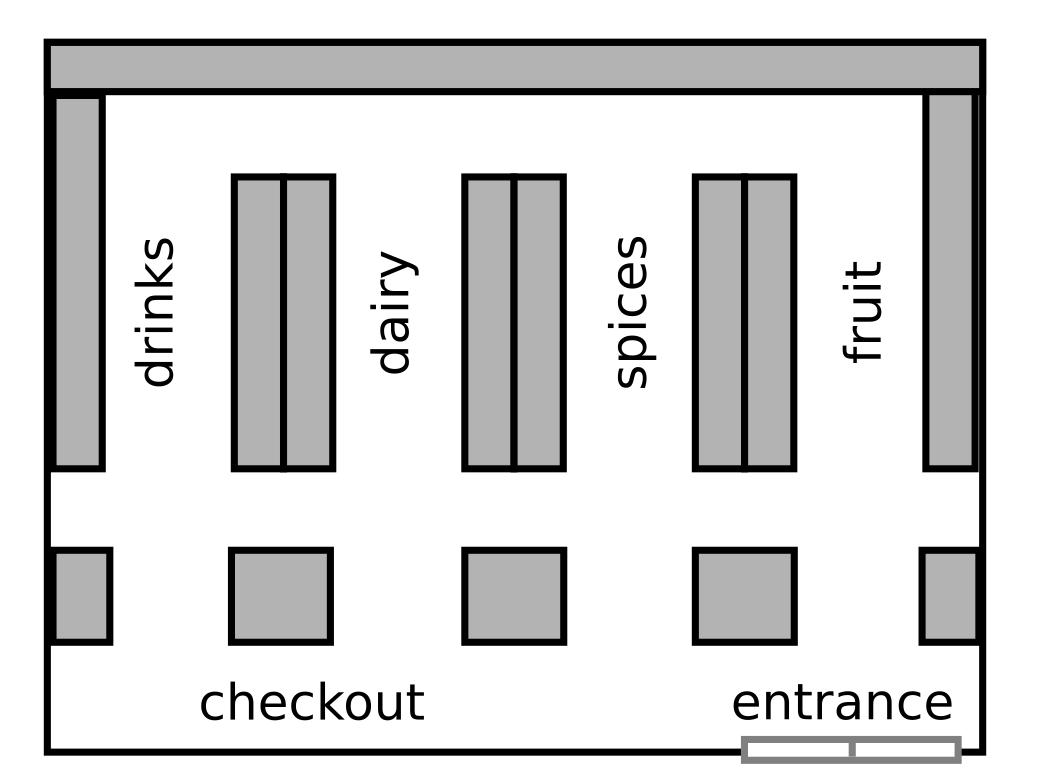

The customers can move between these areas freely. Sooner or later, they will enter the checkout area. Once they do, they are considered to have left the shop.

The movement of all DOODL customers during a five-day week is anonymously tracked. 
In the following files there are tabular data, which indicate 
where customers spent their time. 
The data is complete.


                monday.csv ł tuesday.csv ł wednesday.csv ł thursday.csv ł friday.csv


## Load the data

Write a function to read all the files at once.

In [2]:
def load_data():
    
    """
    
    This fuction reads as DataFrames all .csv files in data directory, 
    appends them in a list, concats them in a single DataFrame, 
    sorts it by time and returns it.
    
    """
    df_list = []
    for file in os.listdir("data/"):
        if file.endswith(".csv"):
            df = pd.read_csv(f"data/{file}", sep = ";", index_col = 0, parse_dates = True)
            df_list.append(df)

    df = pd.concat(df_list)
    df.sort_values(by = "timestamp", inplace = True)
    return df

In [3]:
df = load_data()

In [4]:
df.head()

,customer_no,location
timestamp,,
2019-09-02 07:03:00,1,dairy
2019-09-02 07:03:00,2,dairy
2019-09-02 07:04:00,3,dairy
2019-09-02 07:04:00,4,dairy
2019-09-02 07:04:00,5,spices


In [5]:
df.shape

(24877, 2)

In [6]:
df.columns

Index(['customer_no', 'location'], dtype='object')

In [7]:
df.index

DatetimeIndex(['2019-09-02 07:03:00', '2019-09-02 07:03:00',
               '2019-09-02 07:04:00', '2019-09-02 07:04:00',
               '2019-09-02 07:04:00', '2019-09-02 07:04:00',
               '2019-09-02 07:04:00', '2019-09-02 07:04:00',
               '2019-09-02 07:05:00', '2019-09-02 07:05:00',
               ...
               '2019-09-06 21:49:00', '2019-09-06 21:49:00',
               '2019-09-06 21:49:00', '2019-09-06 21:49:00',
               '2019-09-06 21:50:00', '2019-09-06 21:50:00',
               '2019-09-06 21:50:00', '2019-09-06 21:50:00',
               '2019-09-06 21:50:00', '2019-09-06 21:50:00'],
              dtype='datetime64[ns]', name='timestamp', length=24877, freq=None)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24877 entries, 2019-09-02 07:03:00 to 2019-09-06 21:50:00
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_no  24877 non-null  int64 
 1   location     24877 non-null  object
dtypes: int64(1), object(1)
memory usage: 583.1+ KB


## Create time-related features

Extract time information.

In [9]:
df["time"] = df.index.time

Extract day information.

In [10]:
df["weekday"] = df.index.weekday

Extract date information.

In [11]:
df["date"] = df.index.date

Extract hour information.

In [12]:
df["hour"] = df.index.hour

Extract minute information.

In [13]:
df["minute"] = df.index.minute

In [14]:
df

,customer_no,location,time,weekday,date,hour,minute
timestamp,,,,,,,
2019-09-02 07:03:00,1,dairy,07:03:00,0,2019-09-02,7,3
2019-09-02 07:03:00,2,dairy,07:03:00,0,2019-09-02,7,3
2019-09-02 07:04:00,3,dairy,07:04:00,0,2019-09-02,7,4
2019-09-02 07:04:00,4,dairy,07:04:00,0,2019-09-02,7,4
2019-09-02 07:04:00,5,spices,07:04:00,0,2019-09-02,7,4
...,...,...,...,...,...,...,...
2019-09-06 21:50:00,1500,dairy,21:50:00,4,2019-09-06,21,50
2019-09-06 21:50:00,1510,spices,21:50:00,4,2019-09-06,21,50
2019-09-06 21:50:00,1509,drinks,21:50:00,4,2019-09-06,21,50


## Create a unique customer id

In [15]:
#df["weekday"].nunique()

In [16]:
df["customer_id"] = df["weekday"].astype(str) + "_" + df["customer_no"].astype(str)

In [17]:
#df["customer_id"].nunique()

In [18]:
df.head()

,customer_no,location,time,weekday,date,hour,minute,customer_id
timestamp,,,,,,,,
2019-09-02 07:03:00,1,dairy,07:03:00,0,2019-09-02,7,3,0_1
2019-09-02 07:03:00,2,dairy,07:03:00,0,2019-09-02,7,3,0_2
2019-09-02 07:04:00,3,dairy,07:04:00,0,2019-09-02,7,4,0_3
2019-09-02 07:04:00,4,dairy,07:04:00,0,2019-09-02,7,4,0_4
2019-09-02 07:04:00,5,spices,07:04:00,0,2019-09-02,7,4,0_5


## Add missing checkout values

Find the closing time of the supermarket on Monday.

In [19]:
closing_time = df.index.max().time()

In [20]:
print(closing_time)

21:50:00


Define a function for adding the missing values to checkout customers at the closing time.

In [21]:
def missing_checkout(df):
    
    ids =df["customer_id"].unique()
    for id in ids:
        ids_df = df[df["customer_id"] == id]
        
        if "checkout" in ids_df["location"].values:
            pass
        
        else:
            checkout_dict = {"customer_id" : id, "location" : "checkout", 
                             "time" : closing_time, "hour" : 21, "minute": 50}
            
            print(id)
            df = df.append(checkout_dict, ignore_index = True)
    
    return df

In [22]:
df = missing_checkout(df)

0_1430
0_1433
0_1437
0_1439
0_1440
0_1441
0_1443
0_1445
0_1446
0_1447


/tmp/ipykernel_11884/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)
/tmp/ipykernel_11884/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)
/tmp/ipykernel_11884/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)
/tmp/ipykernel_11884/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)
/tmp/ipykernel_11884/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will

1_1411
1_1422


/tmp/ipykernel_11884/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)
/tmp/ipykernel_11884/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)


2_1520
2_1527
2_1529
2_1528
2_1530


/tmp/ipykernel_11884/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)
/tmp/ipykernel_11884/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)
/tmp/ipykernel_11884/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)
/tmp/ipykernel_11884/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)
/tmp/ipykernel_11884/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will

3_1527
3_1532
3_1533


/tmp/ipykernel_11884/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)
/tmp/ipykernel_11884/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)
/tmp/ipykernel_11884/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)


4_1494
4_1496
4_1500
4_1503
4_1505
4_1506
4_1510
4_1509


/tmp/ipykernel_11884/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)
/tmp/ipykernel_11884/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)
/tmp/ipykernel_11884/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)
/tmp/ipykernel_11884/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(checkout_dict, ignore_index = True)
/tmp/ipykernel_11884/2246914304.py:15: FutureWarning: The frame.append method is deprecated and will

Check for missng values.

In [23]:
df.isna().sum()

customer_no    28
location        0
time            0
weekday        28
date           28
hour            0
minute          0
customer_id     0
dtype: int64

Fill missing values using forward fill method.

In [24]:
df = df.sort_values(by = ["customer_id", "time"]).fillna(method = "ffill")

In [25]:
df.head()

,customer_no,location,time,weekday,date,hour,minute,customer_id
0,1.0,dairy,07:03:00,0.0,2019-09-02,7,3,0_1
8,1.0,checkout,07:05:00,0.0,2019-09-02,7,5,0_1
19,10.0,fruit,07:06:00,0.0,2019-09-02,7,6,0_10
25,10.0,checkout,07:08:00,0.0,2019-09-02,7,8,0_10
304,100.0,drinks,07:56:00,0.0,2019-09-02,7,56,0_100


In [26]:
df.isna().sum()

customer_no    0
location       0
time           0
weekday        0
date           0
hour           0
minute         0
customer_id    0
dtype: int64

## Timestamp as index

Reconstuct timestamp and set it as index.

In [27]:
df["timestamp"] = pd.to_datetime(df["date"].astype(str) + " " + df["time"].astype(str))

In [28]:
df.head(1)

,customer_no,location,time,weekday,date,hour,minute,customer_id,timestamp
0,1.0,dairy,07:03:00,0.0,2019-09-02,7,3,0_1,2019-09-02 07:03:00


In [29]:
df = df.set_index(["timestamp"])

In [30]:
df.head(1)

,customer_no,location,time,weekday,date,hour,minute,customer_id
timestamp,,,,,,,,
2019-09-02 07:03:00,1.0,dairy,07:03:00,0.0,2019-09-02,7,3,0_1


In [31]:
df = df.sort_values(by = ["timestamp", "customer_id"])

In [32]:
df.head()

,customer_no,location,time,weekday,date,hour,minute,customer_id
timestamp,,,,,,,,
2019-09-02 07:03:00,1.0,dairy,07:03:00,0.0,2019-09-02,7,3,0_1
2019-09-02 07:03:00,2.0,dairy,07:03:00,0.0,2019-09-02,7,3,0_2
2019-09-02 07:04:00,3.0,dairy,07:04:00,0.0,2019-09-02,7,4,0_3
2019-09-02 07:04:00,4.0,dairy,07:04:00,0.0,2019-09-02,7,4,0_4
2019-09-02 07:04:00,5.0,spices,07:04:00,0.0,2019-09-02,7,4,0_5


## Drop columns ł Export DataFrame locally

In [33]:
df = df.drop(["customer_no"], axis = 1)

In [34]:
df

,location,time,weekday,date,hour,minute,customer_id
timestamp,,,,,,,
2019-09-02 07:03:00,dairy,07:03:00,0.0,2019-09-02,7,3,0_1
2019-09-02 07:03:00,dairy,07:03:00,0.0,2019-09-02,7,3,0_2
2019-09-02 07:04:00,dairy,07:04:00,0.0,2019-09-02,7,4,0_3
2019-09-02 07:04:00,dairy,07:04:00,0.0,2019-09-02,7,4,0_4
2019-09-02 07:04:00,spices,07:04:00,0.0,2019-09-02,7,4,0_5
...,...,...,...,...,...,...,...
2019-09-06 21:50:00,checkout,21:50:00,4.0,2019-09-06,21,50,4_1508
2019-09-06 21:50:00,drinks,21:50:00,4.0,2019-09-06,21,50,4_1509
2019-09-06 21:50:00,checkout,21:50:00,4.0,2019-09-06,21,50,4_1509


In [35]:
df.to_csv("customer_data_extended.csv")

In [36]:
df = df.drop(["time", "weekday", "date", "hour", "minute"], axis = 1)

In [37]:
df

,location,customer_id
timestamp,,
2019-09-02 07:03:00,dairy,0_1
2019-09-02 07:03:00,dairy,0_2
2019-09-02 07:04:00,dairy,0_3
2019-09-02 07:04:00,dairy,0_4
2019-09-02 07:04:00,spices,0_5
...,...,...
2019-09-06 21:50:00,checkout,4_1508
2019-09-06 21:50:00,drinks,4_1509
2019-09-06 21:50:00,checkout,4_1509


In [38]:
df.to_csv("customer_data.csv")